## Exploratory Data Analysis: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. Documentation of our analysis with proper visualizations.


### Merge seperate files provided inside train, test and validation together to create files we are going to use on the models

In [145]:
import os
import pandas as pd

# TRAIN
# check if train_final.csv exists and delete it if it does
if os.path.exists("data/train/train_final.csv"):
    os.remove("data/train/train_final.csv")
# Get all files in the Train folder
files_train = os.listdir("data/train")
# Load all files and concatenate them
dfs = [pd.read_csv(f"data/train/{file}") for file in files_train]
data_train = pd.concat(dfs)
# Save the concatenated data
data_train.to_csv("data/train/train_final.csv", index=False)

# TEST
# check if test_final.csv exists and delete it if it does
if os.path.exists("data/test/test_final.csv"):
    os.remove("data/test/test_final.csv")
# Get all files in the Test folder
files_test = os.listdir("data/test")
# Load all files and concatenate them
dfs2 = [pd.read_csv(f"data/test/{file}") for file in files_test]
data_test = pd.concat(dfs2)
# Save the concatenated data
data_test.to_csv("data/test/test_final.csv", index=False)

# VALIDATION
# check if validation_final.csv exists and delete it if it does
if os.path.exists("data/validation/validation_final.csv"):
    os.remove("data/validation/validation_final.csv")
# Get all files in the Validation folder
files_validation = os.listdir("data/validation")
# Load all files and concatenate them
dfs3 = [pd.read_csv(f"data/validation/{file}") for file in files_validation]
data_validation = pd.concat(dfs3)
# Save the concatenated data
data_validation.to_csv("data/validation/validation_final.csv", index=False)

# MERGED
# check if merged.csv exists and delete it if it does
if os.path.exists("data/merged/merged.csv"):
    os.remove("data/merged/merged.csv")
# Load all files and concatenate them
dfs4 = [data_train, data_test, data_validation]
data_merged = pd.concat(dfs4)
# Save the concatenated data
data_merged.to_csv("data/merged/merged.csv", index=False)

### Represent data visually

In [146]:
import pandas as pd

# Load the data (only train data for now)
data = pd.read_csv("data/merged/merged.csv")

# Function to color-code labels
def highlight_labels(val):
    color_map = {
        "polite": "green",
        "somewhat polite": "lightgreen",
        "neutral": "lightgray",
        "impolite": "red"
    }
    return f"background-color: {color_map.get(val, 'white')}; color: black"

# Apply styling
styled_df = data.head(10).style.applymap(highlight_labels, subset=['label'])

# Display the styled DataFrame
styled_df

C:\Users\franc\AppData\Local\Temp\ipykernel_2664\2833509173.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = data.head(10).style.applymap(highlight_labels, subset=['label'])


,text,label,source,reasoning
0,Your flight has been rescheduled for 10:00 AM tomorrow. Please check the airport's website for any updates or changes.,neutral,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text would be classified as ""neutral"" because it provides factual information about the flight reschedule without any emotional undertones or attempts at politeness. The tone is impersonal and focused solely on conveying the necessary details."
1,We're happy to accommodate your dietary preferences. Our vegetarian options are carefully crafted to ensure a delicious and satisfying meal. Would you like me to recommend some dishes that fit your needs?,polite,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text is polite because it expresses gratitude for the customer's dietary preferences and acknowledges their importance. The use of phrases like ""We're happy to accommodate"" and ""Would you like me to recommend"" shows a welcoming tone and a willingness to help, making the customer feel valued and supported."
2,"Our vegetarian options are available on the menu, and our chef can modify any dish to suit your dietary needs.",neutral,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text would be classified as ""neutral"" because it provides factual information about the menu options without expressing any emotional tone or attempting to persuade the customer. The language is straightforward, and the tone is impersonal, focusing solely on conveying the necessary information."
3,"I understand your frustration with the recent tournament results, and I'll review the standings to see what we can do to improve your experience.",somewhat polite,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text would be classified as ""somewhat polite."" The acknowledgment of the customer's frustration shows a basic level of respect. The sentence is direct and lacks additional warmth or formality, but it communicates a willingness to help and review the situation. The use of ""I'll review"" is a straightforward commitment to action without additional courteous phrases that would make it fully polite."
4,"I'll do my best to find a suitable replacement for the item you're looking for, but I need to know more about what you're looking for.",somewhat polite,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text would be classified as ""somewhat polite."" The acknowledgment of the customer's request and the commitment to help (""I'll do my best"") show a basic level of respect. However, the sentence is direct and lacks additional warmth or formality, and the phrase ""but I need to know more about what you're looking for"" comes across as somewhat curt, preventing it from being fully polite."
5,"We're delighted to have you visit our zoo today! Our animal enclosures are designed to provide a safe and immersive experience for both our visitors and the animals. If you have any questions or need assistance, please don't hesitate to ask our friendly staff.",polite,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text is polite because it expresses enthusiasm and welcomes the visitor to the zoo. The language used is considerate and shows respect for the visitor's experience. The phrase ""Our friendly staff"" emphasizes the zoo's commitment to providing a positive and helpful experience, further enhancing the visitor's visit."
6,Are you seriously complaining about the size of your shirt? It's right there on the label. You should have read it before buying.,impolite,meta-llama/Meta-Llama-3.1-8B-Instruct,"This text is impolite due to its dismissive and condescending tone, as well as its use of a rhetorical question to belittle the customer's concern. The phrase ""You should have read it before buying"" comes across as accusatory and unhelpful, failing to address the customer's issue in a constructive manner."
7,"Prices seem reasonable, no complaints.",neutral,meta-llama/Meta-Llama-3.1-8B-Instruct,"This statement is straightforward and factual, without emotional undertones or specific attempts

### Classes

label
polite             25067
neutral            25053
somewhat polite    25048
impolite           25032
Name: count, dtype: int64


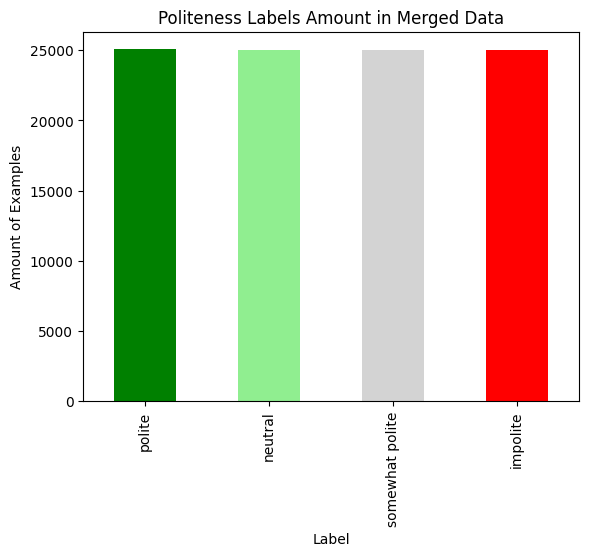

In [147]:
import matplotlib.pyplot as plt

# Get amount of labels in merged data and how many examples of each label
label_counts = data['label'].value_counts()
print(label_counts)

# Plot the amount of examples of each label
label_counts.plot(kind='bar', color=['green', 'lightgreen', 'lightgray', 'red'], title='Politeness Labels Amount in Merged Data', ylabel='Amount of Examples', xlabel='Label')
# Show the plot
plt.show()